In [8]:
#for loop - to iterate in a sequance
list = ['Fauzan', 'Norma', 'Fandi', 'Rizqi']

for i in list :
    if i == 'Norma' :
        continue 
    print(i) # print each single name in list
    


Fauzan
Fandi
Rizqi


In [14]:
list_2 = [[1,2,3,4]]

In [15]:
list_2.shape()

AttributeError: 'list' object has no attribute 'shape'

#skip norma, and then continue print the other name after "Fauzan"

In [6]:
def linear (a, b):
    z = a+b
    q = b*a
    result = z+q
    return result

In [7]:
linear(5,6)

41

In [23]:
def nonlinear(a,b) :
    if a > 5 :
        print('Not Working')
    elif b == 2:
        print ('Fi you')
    else :
        z = a*b
    return z
    

# Data Loading

In [1]:
import pandas as pd
import matplotlib as plt

In [4]:
df = pd.read_csv('D:/Trial/Trial Sentinel Nutrient Status/Safari Riau Sentinel 2 Fix/2021_SR/Vegetation Index/Mineral_VI2.csv')

In [5]:
df.head()

,SAVI,MSAVI1,MSAVI2,NDVI,GNDVI,ARVI,CI_RE,NDVI_RE,N
0,0.561590,0.518594,0.586838,0.861354,0.764891,0.853762,0.266575,0.34355,2.67
1,0.560762,0.516527,0.586649,0.873661,0.774482,0.870025,0.266625,0.34520,2.47
2,0.554815,0.508985,0.578110,0.877120,0.788915,0.876135,0.270700,0.34785,2.44
3,0.554929,0.509721,0.578393,0.872033,0.780502,0.871657,0.270500,0.35790,2.38
4,0.569649,0.527532,0.599213,0.871600,0.787134,0.863433,0.274625,0.35550,2.42


In [4]:
##rename column
#g= c.rename(columns = {'leaf_area_':'leaf_area_index'
                      #, 'frond_dry_': 'frond_dry_weight'})

##Drop unecessary column
#df = g.drop(labels = ['manuring_b', 'Tanah'], axis = 1)

In [6]:
##Calculating correlation over variable
import seaborn as sns

Text(0.5, 1.0, 'Correlation Variables')

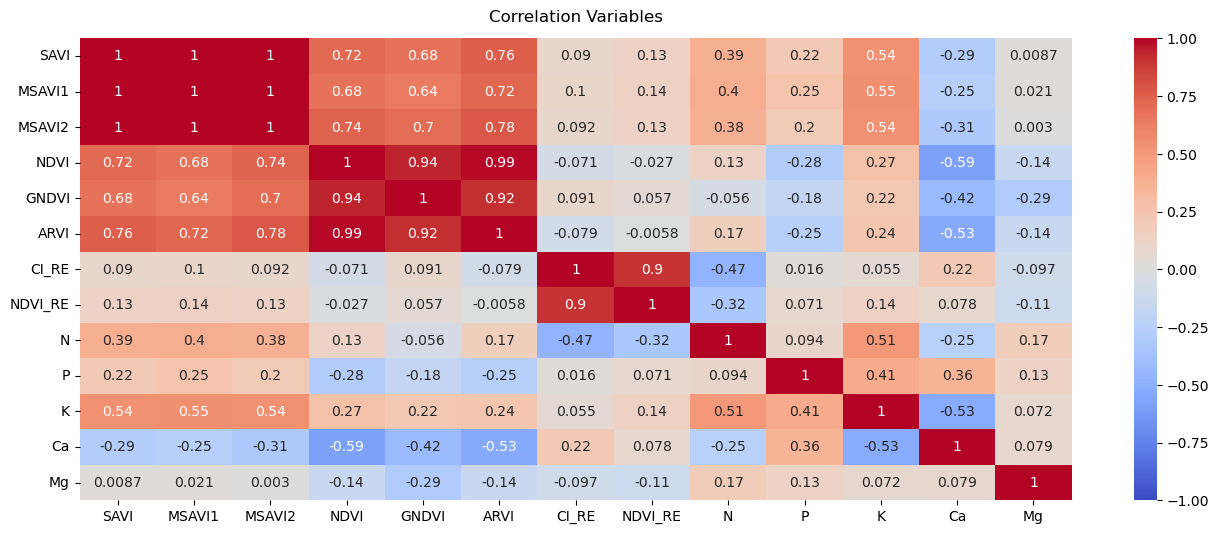

In [6]:
##creating rectangular heatmap
plt.pyplot.figure(figsize=(16,6))
heatmap =sns.heatmap(df.corr(), vmin= -1,
           vmax = 1, annot=True, cmap = 'coolwarm')
heatmap.set_title('Correlation Variables', fontdict={'fontsize' : 12}, pad=12)

In [7]:
##creating triangle heatmap
import numpy as np

In [8]:
##masking the upper triangle using np.triu which have 1 value (np.ones_like)
mask = np.triu(np.ones_like(df.corr()))

Text(0.5, 1.0, 'Correlation Variables')

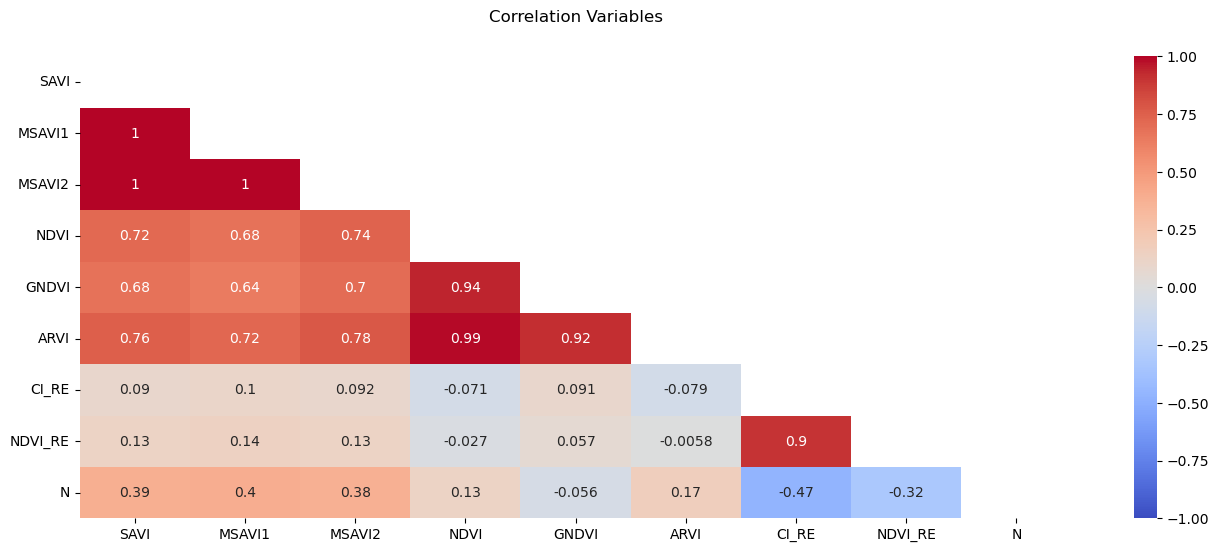

In [9]:
#correlation
plt.pyplot.figure(figsize=(16,6))
heatmap =sns.heatmap(df.corr(), vmin= -1,
           vmax = 1, mask=mask,annot=True, cmap = 'coolwarm')
heatmap.set_title('Correlation Variables', fontdict={'fontsize' : 12}, pad=25)

MSAVI and CI_RE might be good for N prediction even though the correlation is moderate

In [11]:
#save heatmap as png
plt.pyplot.savefig('heatmap.png', dpi = 300, bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

# Data Visualization

In [ ]:
#single displot per variable 
sns.displot(df[['B5']],kind = 'kde')
sns.displot(df[['B3']], kind = 'kde')
sns.displot(df[['B2']], kind = 'kde')
plt.pyplot.show()


# Stepwise Regression for N

In [10]:
#Getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SAVI     14 non-null     float64
 1   MSAVI1   14 non-null     float64
 2   MSAVI2   14 non-null     float64
 3   NDVI     14 non-null     float64
 4   GNDVI    14 non-null     float64
 5   ARVI     14 non-null     float64
 6   CI_RE    14 non-null     float64
 7   NDVI_RE  14 non-null     float64
 8   N        14 non-null     float64
 9   P        14 non-null     float64
 10  K        14 non-null     float64
 11  Ca       14 non-null     float64
 12  Mg       14 non-null     float64
dtypes: float64(13)
memory usage: 1.5 KB


In [14]:
#drop no need column for N prediction
nodata = ['leaf_area', 'leaf_area_index', 'frond_dry_weight', 'P', 'K', 'Ca', 'Mg'] 
#df_n = df.drop(labels = nodata, axis = 1)


In [21]:
df.iloc[0:3] #data slicing based on row which three consecutive row 


,SAVI,MSAVI1,MSAVI2,NDVI,GNDVI,ARVI,CI_RE,NDVI_RE,N,P,K,Ca,Mg
0,0.561590,0.518594,0.586838,0.861354,0.764891,0.853762,0.266575,0.34355,2.67,0.147,1.38,0.47,0.24
1,0.560762,0.516527,0.586649,0.873661,0.774482,0.870025,0.266625,0.34520,2.47,0.149,1.19,0.49,0.27
2,0.554815,0.508985,0.578110,0.877120,0.788915,0.876135,0.270700,0.34785,2.44,0.138,1.07,0.52,0.23


In [26]:
df.loc[:, :'N'] #data slicing from 1st column to N column

,SAVI,MSAVI1,MSAVI2,NDVI,GNDVI,ARVI,CI_RE,NDVI_RE,N
0,0.561590,0.518594,0.586838,0.861354,0.764891,0.853762,0.266575,0.34355,2.67
1,0.560762,0.516527,0.586649,0.873661,0.774482,0.870025,0.266625,0.34520,2.47
2,0.554815,0.508985,0.578110,0.877120,0.788915,0.876135,0.270700,0.34785,2.44
3,0.554929,0.509721,0.578393,0.872033,0.780502,0.871657,0.270500,0.35790,2.38
4,0.569649,0.527532,0.599213,0.871600,0.787134,0.863433,0.274625,0.35550,2.42
5,0.569637,0.526610,0.599903,0.881027,0.798713,0.880360,0.278000,0.36945,2.40
6,0.562962,0.519157,0.589653,0.873722,0.788842,0.867950,0.279475,0.36930,2.39
7,0.564934,0.521237,0.593103,0.878133,0.785650,0.872852,0.282625,0.37185,2.39
8,0.562185,0.517843,0.588982,0.878127,0.797302,0.872848,0.270700,0.33490,2.36
9,0.541857,0.494673,0.559253,0.864023,0.766050,0.854187,0.266100,0.33815,2.42


# VIF (Variance Inflation Factor) extraction (for n status)

to reduce multicollinearity

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

In [24]:
df_n = df.drop(labels = ['K', 'P', 'Mg','Ca'], axis = 1)

In [79]:
vif_data = pd.DataFrame()

In [80]:
vif_data['features'] = df_n.columns

In [81]:
vif_data

,features
0,SAVI
1,MSAVI1
2,MSAVI2
3,NDVI
4,GNDVI
5,ARVI
6,CI_RE
7,NDVI_RE


In [82]:
vif_data['VIF'] = [variance_inflation_factor(df_n.values,i)
                  for i in range(df_n.shape[1])]

print(vif_data)

  features           VIF
0     SAVI  4.988849e+07
1   MSAVI1  7.005764e+07
2   MSAVI2  8.686205e+06
3     NDVI  3.076069e+06
4    GNDVI  3.985793e+04
5     ARVI  1.545195e+05
6    CI_RE  2.510088e+04
7  NDVI_RE  7.658340e+03


If we consider multiple regression or machine learning , SAVI, MSAVI 1, MSAVI2,NDVI_RE are not included due to the VIF >5 which is high in multicollinearity

# Regression (Single variable) using msavi for n prediction on palms in mineral soil

In [28]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

In [29]:
X= df_n['MSAVI1']
y= df_n['N']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.4)

In [27]:
print('Shape_Xtrain', X_train.shape)
print('Shape_Xtest', X_test.shape)

Shape_Xtrain (8,)
Shape_Xtest (6,)


In [50]:
#Quadratic Regression / 
model = np.poly1d(np.polyfit(X_train,y_train,2))

print(model)

        2
-175.4 x + 181.2 x - 44.35


In [53]:
quad = model(X_test)
print(quad)

[2.47200809 2.47115972 2.45151488 2.42077877 2.46192636 2.17853483]


In [39]:
from sklearn.metrics import r2_score


In [61]:
print(y_test)
print(quad)

8     2.36
6     2.39
4     2.42
11    2.35
2     2.44
13    2.31
Name: N, dtype: float64
[2.47200809 2.47115972 2.45151488 2.42077877 2.46192636 2.17853483]


In [66]:
r2_score(quad, y_test)

0.3469903665530649

In [58]:
#Linear regression
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [77]:
X_linear = X_train.values.reshape(-1,1)
y_linear = y_train.values.reshape(-1,1)

In [79]:
linear= model2.fit(X_linear, y_linear)

In [89]:
print(linear.coef_)
print(linear.intercept_)

[[1.5751888]]
[1.63561545]


Y = 1.575188(MSAVI1)+1.6356145

In [82]:
X_test_linear =X_test.values.reshape(-1,1)

In [90]:
n_linear = linear.predict(X_test_linear)

In [93]:
n_linear

array([[2.45131647],
       [2.45338522],
       [2.46657874],
       [2.42246522],
       [2.43736292],
       [2.38499052]])

In [92]:
r2_score(y_test, n_linear)

-1.2125720345597677

In [21]:
#OLS regression
import statsmodels.api as sm

In [22]:
X_ols = sm.add_constant(X_train)

In [36]:
model3 = sm.OLS(y_train, X_train).fit()

In [37]:
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      N   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              4592.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                    4.01e-11
Time:                        09:59:12   Log-Likelihood:                          7.4372
No. Observations:                   8   AIC:                                     -12.87
Df Residuals:                       7   BIC:                                     -12.79
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

y = 4.7517(MSAVI1) 

In [40]:
n_ols= model3.predict(X_test)

In [41]:
print(n_ols)

8     2.460644
6     2.466884
4     2.506684
11    2.373611
2     2.418552
13    2.260565
dtype: float64


# Regression Single Variable using CI_RE for n prediction on palms in mineral soil

In [45]:
X2 = df_n['CI_RE']
y2= df_n ['N']


In [47]:
#Splitting
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size = 0.4)

In [48]:
#Quadratic Regression
model_re = np.poly1d(np.polyfit(X2_train,y2_train,2))

print(model_re)

       2
858.5 x - 477 x + 68.64


In [49]:
quad_re = model_re(X2_test)
print(quad_re)

[2.43241122 2.39157355 2.39780123 2.43302275 2.43241122 2.39880616]


In [50]:
#OLS regression

In [52]:
modelols_re = sm.OLS(y2_train, X2_train).fit()

In [54]:
print(modelols_re.summary())

                                 OLS Regression Results                                
Dep. Variable:                      N   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2829.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                    2.18e-10
Time:                        10:37:42   Log-Likelihood:                          5.5039
No. Observations:                   8   AIC:                                     -9.008
Df Residuals:                       7   BIC:                                     -8.928
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Lenovo\miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
n_ols_re= modelols_re.predict(X2_test)

In [56]:
n_ols_re

8     2.432556
6     2.511409
4     2.467826
11    2.432106
2     2.432556
13    2.526461
dtype: float64

In [57]:
#linear regression
X2_linear = X2_train.values.reshape(-1,1)
y2_linear = y2_train.values.reshape(-1,1)

In [59]:
linear_re= model2.fit(X2_linear, y2_linear)

In [60]:
print(linear_re.coef_)
print(linear_re.intercept_)

[[-6.91165601]]
[4.32628523]


In [61]:
X2_test_linear =X2_test.values.reshape(-1,1)

In [62]:
n_re_linear = linear_re.predict(X2_test_linear)

In [63]:
n_re_linear

array([[2.45529995],
       [2.39465017],
       [2.4281717 ],
       [2.45564553],
       [2.45529995],
       [2.38307314]])

# P value extraction using OLS regression


To know which set of bands are representative for N status prediction  

In [24]:
x_columns =[  'B2','B3' ,'B4','B5', 'B11'] #chosen based on resolution, 60 m resolution is too low 
y = df_n['N'] #target

In [25]:
##creating function to get model statistics
import statsmodels.api as sm

In [26]:
#create a function to generate OLS regression results 
def get_stats():
    X= sm.add_constant(df_n[x_columns]) #add constanta 
    results= sm.OLS(y,X).fit()
    print(results.summary())


In [27]:
get_stats()

#erorr might apper when number of observations less than number of features

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     15.73
Date:                Fri, 09 Sep 2022   Prob (F-statistic):            0.00975
Time:                        14:13:57   Log-Likelihood:                 25.703
No. Observations:                  10   AIC:                            -39.41
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0917      0.359     -0.255      0.8

C:\Users\Lenovo\miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


B4, B5,B6, B7, B8, B8, B8A were found to have statistically significant with each other at the 0.05 significance level, but it has strong multicollinearity, Since we do not in-depth in each other variable, it can be neglected for prediction 

In [36]:
##building the model
X= df_n[[ 'B2','B3' ,'B4','B5', 'B11']]
y = df_n['N']

In [37]:
#Split the data to training and testing data
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.4)

In [39]:
print('Shape_Xtrain', X_train.shape)
print('Shape_Xtest', X_test.shape)

Shape_Xtrain (6, 5)
Shape_Xtest (4, 5)


In [40]:
X_cons = sm.add_constant(X_train) #add intercept in the equation 

In [45]:
model = sm.OLS(y_train, X_train).fit()

In [46]:
model

In [47]:
n_pred = model.predict(X_test)

In [48]:
n_pred #prediction


2    2.252477
8    2.308722
4    2.470401
9    2.534155
dtype: float64

In [49]:
#Actual
y_test

2    2.44
8    2.36
4    2.42
9    2.42
Name: N, dtype: float64

In [50]:
frames = [n_pred, y_test]
merge = pd.concat(frames, keys=["Actual", "Prediction"])

In [51]:
merge

Actual      2    2.252477
            8    2.308722
            4    2.470401
            9    2.534155
Prediction  2    2.440000
            8    2.360000
            4    2.420000
            9    2.420000
dtype: float64

In [52]:
#MAPE Calculation
from sklearn.metrics import mean_absolute_percentage_error

In [53]:
mape = mean_absolute_percentage_error(y_test, n_pred)

In [54]:
mape

0.041644988871163045

In [ ]:
    Actual   Prediction         Akurasi = jumlah kategori cocok/total data test = 4/5 = 75%
2   Optimum   Optimum           
8   Defisensi Defisiens          
4   Optimum   Defisiensi          
9   Optimum   Optimum   

based on von Uexkull and Fairhurst 1991

In [ ]:
print(r2_score(y_test,n_pred))

In [ ]:
print(r_squared)

# Quadratic Regeression
single variable

In [ ]:
#Polynomial degree fit with degree 2
model2 = np.poly1d(np.polyfit(X_train['B5'],y_train,2)) #Band 5 is chosen based on the lowest P value & Highest correlation  with N status

In [ ]:
#Reveal the model
print(model2)

In [ ]:
#r2 quadratic regression
print(r2_score(y_test, model2(X_test['B5'])))

In [ ]:
n_pred2 = model2(X_test['B5'])

In [ ]:
y_test

In [ ]:
polyline = np.linspace(0, 5) #start number X= 0, iterative calculation from X=0 to X= 20,  ,  
plt.pyplot.scatter(y_test, n_pred2)
plt.pyplot.plot(polyline, model2(polyline))
plt.pyplot.show()